In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data= pd.read_csv('learningSet.csv')
data

C:\Users\thuyl\AppData\Local\Temp\ipykernel_7048\4190965911.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('learningSet.csv')


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [3]:
data.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=481)

In [5]:
data.shape

(95412, 481)

In [6]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [4]:
data.info

<bound method DataFrame.info of        ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0         8901     GRI      0    IL  61081                    3712      0   
1         9401     BOA      1    CA  91326                    5202      0   
2         9001     AMH      1    NC  27017                       0      0   
3         8701     BRY      0    CA  95953                    2801      0   
4         8601              0    FL  33176                    2001      0   
...        ...     ...    ...   ...    ...      ...      ...   ...    ...   
95407     9601     ASE      1    AK  99504                       0      0   
95408     9601     DCD      1    TX  77379                    5001      0   
95409     9501     MBC      1    MI  48910                    3801      0   
95410     8601     PRV      0    CA  91320                    4005      0   
95411     8801     MCC      2    NC  28409                    1801      0   

      RECINHSE  ... TARGET_D HPHONE_D RFA_2

In [8]:
#Check for null values in all the columns

nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(80)

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
...,...
ADATE_16,21.343227
ADATE_14,19.774242
ADATE_9,11.785729
ADATE_11,10.923154


In [11]:
numerical = data.select_dtypes([np.number])
categorical = data.select_dtypes(include=['object'])

In [31]:
categorical

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,...,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,...,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,...,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [27]:
numerical.columns

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=407)

In [14]:
#Create a new empty list called drop_list.
#We will append this list and then drop all the columns in this list later.

drop_list = ['zip','osource']

In [21]:
#Identify columns that over 85% missing values

nulls_to_drop = list(nulls[nulls['percentage'] > 85].index)
nulls_to_drop

['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23']

In [22]:
#Remove those columns from the dataframe

data1 = data.drop(columns= nulls_to_drop, axis = 1) 

In [23]:
data1

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [28]:
#Reduce the number of categories in the column GENDER.
#The column should only have either "M" for males, "F" for females, and "other" for all the rest

#replacing the nulls with "F" because it is what they are suposed to be.
print(categorical['GENDER'].value_counts())
categorical['GENDER'] = categorical['GENDER'].fillna('F')

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


In [29]:
categorical['GENDER'] = categorical['GENDER'].map(lambda x: str(x).replace(' ','O').replace('C','O').replace('A','O').replace('U', 'O').replace('J','O'))

In [30]:
print(categorical['GENDER'].value_counts())

F    51277
M    39094
O     5041
Name: GENDER, dtype: int64


## Lab Feature Engineering

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
- Use appropriate EDA technique where ever necessary.

In [35]:
nulls_percent_df = pd.DataFrame(numerical.isna().sum()*100/len(numerical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,24.802960
4,NUMCHLD,87.018404
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [36]:
nulls_percent_df[nulls_percent_df['nulls_percentage'] > 0]

,column_name,nulls_percentage
3,AGE,24.802960
4,NUMCHLD,87.018404
5,INCOME,22.309563
6,WEALTH1,46.882992
8,MBCRAFT,55.395548
...,...,...
386,RAMNT_23,91.763091
387,RAMNT_24,81.409047
398,NEXTDATE,10.452564
399,TIMELAG,10.452564


In [37]:
#Only checking for the following columns GEOCODE2, WEALTH1, ADI, DMA,and MSA
nulls_percent_df[(nulls_percent_df.column_name.isin(["GEOCODE2","WEALTH1","ADI", "DMA", "MSA"]))]


,column_name,nulls_percentage
6,WEALTH1,46.882992
150,MSA,0.138347
151,ADI,0.138347
152,DMA,0.138347


In [38]:
numerical['WEALTH1'].value_counts(dropna = False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

The column has a very high value of NaN, at this point we could drop it. because any alteration we will make would drastically alter the distribution, nonetheless we will keep going.

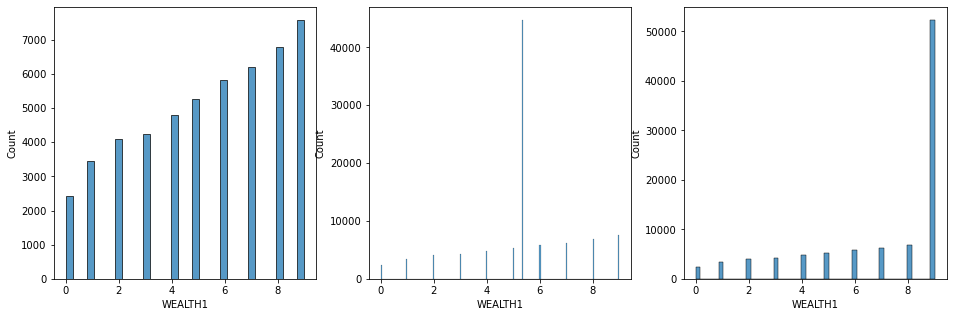

In [41]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['WEALTH1'], ax = ax[0])
sns.histplot(numerical["WEALTH1"].fillna(np.mean(numerical['WEALTH1'])), ax = ax[1])
sns.histplot(numerical["WEALTH1"].fillna(numerical['WEALTH1'].mode()[0]),ax = ax[2])
plt.show()

### Let's check ADI now:

In [42]:
numerical['ADI'].isna().sum()

132

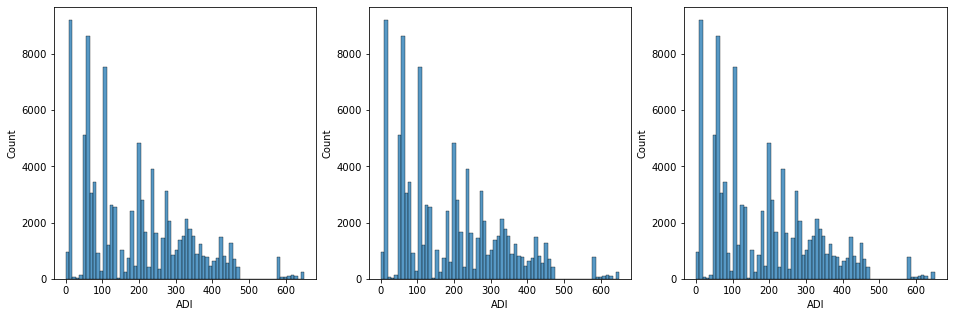

In [43]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['ADI'], ax = ax[0])
sns.histplot(numerical['ADI'].fillna(np.mean(numerical[numerical['ADI'].notna()]['ADI'])), ax = ax[1])
sns.histplot(numerical['ADI'].fillna(np.median(numerical[numerical['ADI'].notna()]['ADI'])),ax = ax[2])
plt.show()

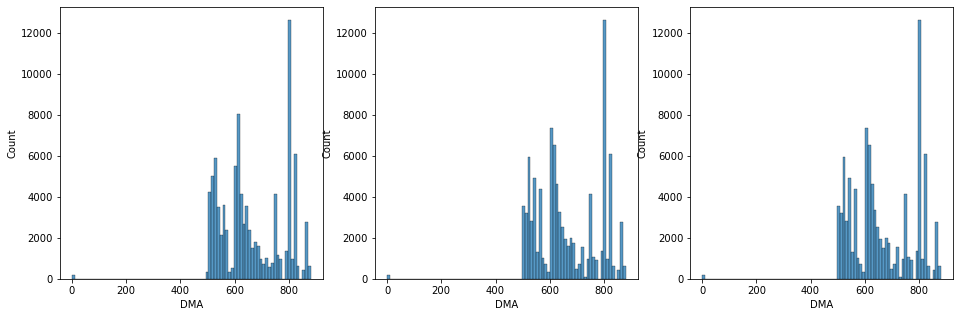

In [44]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['DMA'], ax = ax[0])
sns.histplot(numerical['DMA'].fillna(np.mean(numerical[numerical['DMA'].notna()]['DMA'])), ax = ax[1])
sns.histplot(numerical['DMA'].fillna(np.median(numerical[numerical['DMA'].notna()]['DMA'])),ax = ax[2])
plt.show()

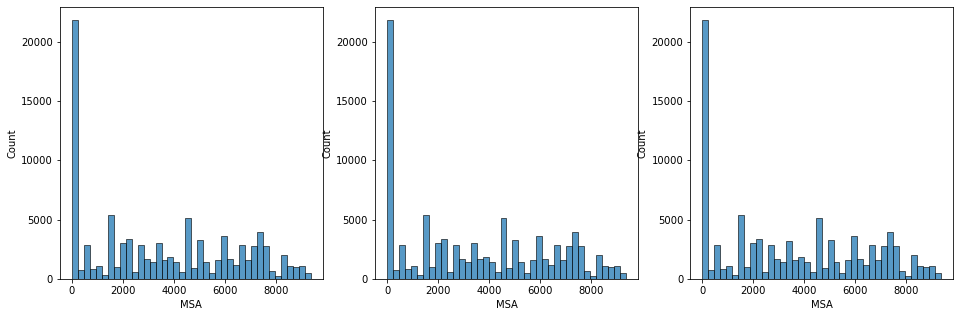

In [45]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['MSA'], ax = ax[0])
sns.histplot(numerical['MSA'].fillna(np.mean(numerical[numerical['MSA'].notna()]['MSA'])), ax = ax[1])
sns.histplot(numerical['MSA'].fillna(np.median(numerical[numerical['MSA'].notna()]['MSA'])),ax = ax[2])
plt.show()